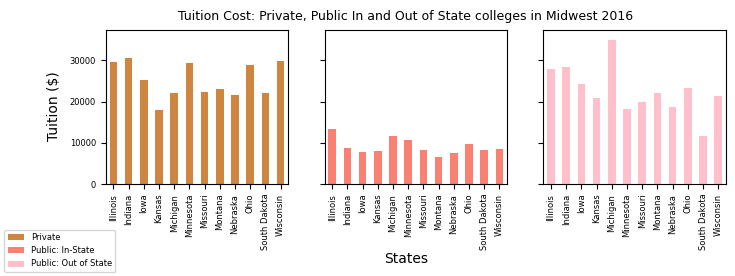

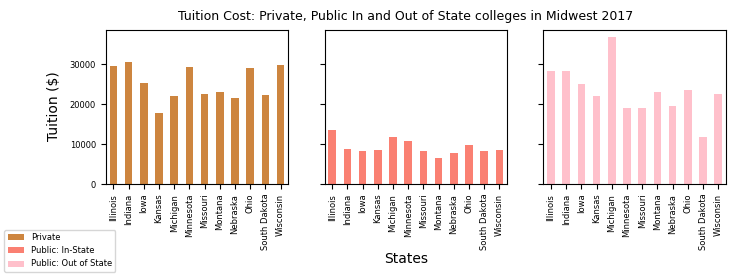

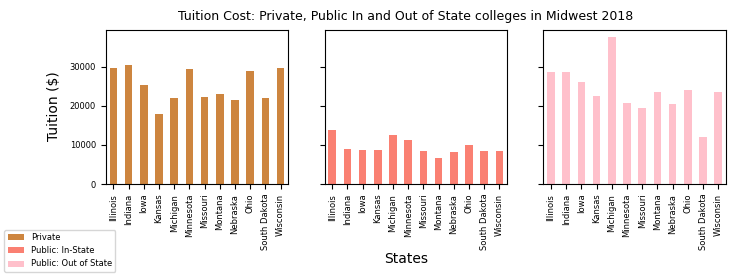

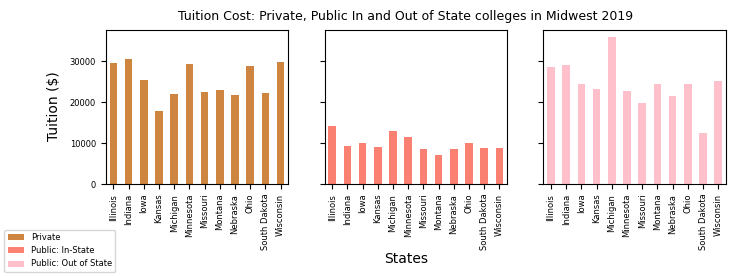

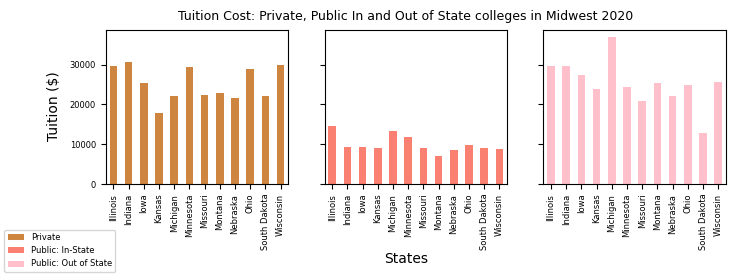

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#ref data: https://www.kaggle.com/datasets/kfoster150/avg-cost-of-undergrad-college-by-state

# step 1 - get the raw data in DataFrame format
data = pd.read_csv('./avg_data_undergrad_college/colleges_tuition_midwest_states.csv')

# step 2 - create new DataFrames based on type/value
df1_private = data[['Year', 'State', 'Type1', 'Value1']]
df2_public_in_state = data[['Year', 'State', 'Type2', 'Value2']]
df3_public_out_state = data[['Year', 'State', 'Type3', 'Value3']]

# step 3 - choose the year we want
end_year = 2020
start_year = 2016
years = list(range(start_year, end_year+1))
for year in years:
    df1_year_filter = df1_private[df1_private['Year'] == year]
    df2_year_filter = df2_public_in_state[df2_public_in_state['Year'] == year]
    df3_year_filter = df3_public_out_state[df3_public_out_state['Year'] == year]

# step 4 - plot the data
# use subplot to graph multiple dataframes across three graphs in one image
    labels = ['Private', 'Public: In-State', 'Public: Out of State']
# make sure we set ncols=3 and sharex and sharey
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)

# plot all three, make sure we set ax=axes[element_num]
# turn label off each axes
    for ax in axes:
        x_axis = ax.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)

    df1_private.plot(kind='bar', x='State', y='Value1', rot=90, figsize=(8,2), fontsize=6, color='peru', ax=axes[0], legend=None)
    df2_year_filter.plot(kind='bar', x='State', y='Value2', rot=90, figsize=(8,2), fontsize=6, color='salmon', ax=axes[1], legend=None )
    df3_year_filter.plot(kind='bar', x='State', y='Value3', rot=90, figsize=(8,2), fontsize=6, color='pink', ax=axes[2], legend=None)

# set the subplot suptitle and where we want the legend to go
    fig.suptitle(f'Tuition Cost: Private, Public In and Out of State colleges in Midwest {year}', fontsize=9)
    fig.legend(labels, loc='lower left', fontsize=6)
# Set common labels across subplot
# you can use negative values for the y as we do here to put States all the way at the bottom
    fig.text(0.5, -0.3, 'States', ha='center', va='bottom')
    fig.text(0.06, 0.5, 'Tuition ($)', ha='center', va='center', rotation='vertical')